<a href="https://colab.research.google.com/github/infamous001/project1/blob/main/Copy_of_regression_and__classification_using_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **First neural network project**

**USING MLP FOR REGRESSION using scikit learn**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)


In [ ]:
mlp_reg=MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
pipeline=make_pipeline(StandardScaler(),mlp_reg)
pipeline.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [ ]:
y_pred=pipeline.predict(X_valid)

In [ ]:
rmse=mean_squared_error(y_pred,y_valid,squared=False)
print(rmse)

0.5053326657968679


**Classification MLP using keras**

In [ ]:
import tensorflow as tf
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
y_train.shape

(55000,)

In [ ]:
X_train,X_valid,X_test=X_train/255.,X_valid/255.,X_test/255.

In [ ]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]

In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hidden1=model.layers[1]
weights,biases=hidden1.get_weights()
weights

array([[ 0.06859012, -0.01979901, -0.00398254, ...,  0.02594791,
         0.04268054, -0.0456558 ],
       [-0.06998206,  0.0117683 ,  0.05104163, ..., -0.05900916,
         0.04871469, -0.0615702 ],
       [-0.02244628,  0.04015655, -0.02939641, ..., -0.02160774,
        -0.03362992,  0.02361912],
       ...,
       [-0.04025017, -0.07320618, -0.03263107, ..., -0.05221047,
         0.07259239, -0.04838721],
       [-0.04986779,  0.05423279, -0.01096643, ...,  0.03793108,
         0.05341786, -0.02720967],
       [ 0.06975175, -0.00672948, -0.05579316, ...,  0.05675565,
        -0.00359683, -0.01918007]], dtype=float32)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7014 - accuracy: 0.7715 - val_loss: 0.5044 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4845 - accuracy: 0.8306 - val_loss: 0.4590 - val_accuracy: 0.8372
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4385 - accuracy: 0.8465 - val_loss: 0.4221 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4136 - accuracy: 0.8553 - val_loss: 0.3953 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.3928 - accuracy: 0.8620 - val_loss: 0.3915 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3769 - accuracy: 0.8674 - val_loss: 0.3885 - val_accuracy: 0.8634
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3644 - accuracy: 0.8706 - val_loss: 0.3737 - val_accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

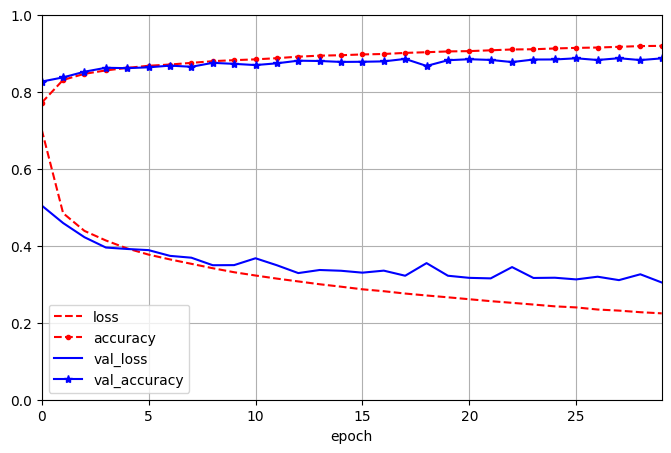

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel="epoch",
                                   style=["r--","r--.","b-","b-*"])
plt.show

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3233 - accuracy: 0.8854


[0.3232530653476715, 0.8853999972343445]

In [ ]:
X_new=X_test[:3]
y_pred=model.predict(X_new)
y_pred.round(2)


1/1 [==============================] - 0s 41ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred=y_pred.argmax(axis=-1)
np.array(class_names)[y_pred]

array(['Ankel boot', 'Pullover', 'Trouser'], dtype='<U11')

**Using tf for regression**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [ ]:
tf.random.set_seed(42)
norm_layer=tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model=tf.keras.Sequential([
  norm_layer,
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(50,activation="relu"),
  tf.keras.layers.Dense(50,activation="relu"),
  tf.keras.layers.Dense(1)
]) 

In [ ]:
model.compile(loss="mse",optimizer="Adam",metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.9102 - root_mean_squared_error: 0.9541 - val_loss: 0.3965 - val_root_mean_squared_error: 0.6297
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3935 - root_mean_squared_error: 0.6273 - val_loss: 1.7084 - val_root_mean_squared_error: 1.3071
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3698 - root_mean_squared_error: 0.6081 - val_loss: 0.3682 - val_root_mean_squared_error: 0.6068
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3485 - root_mean_squared_error: 0.5903 - val_loss: 0.6467 - val_root_mean_squared_error: 0.8042
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3414 - root_mean_squared_error: 0.5843 - val_loss: 0.7739 - val_root_mean_squared_error: 0.8797
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3291 - root_mean_squared_error: 0.5737 - val_loss: 0.4303 - val_

In [ ]:
mse_test,rmse_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2865 - root_mean_squared_error: 0.5352


In [ ]:
X_new=X_test[:3]
y_pred=model.predict(X_new)

1/1 [==============================] - 0s 75ms/step


In [ ]:
print(y_pred.inverse)

[[0.5879937]
 [0.6825582]
 [4.3800726]]
